##TITANIC SURVIVAL PREDICTION:-
-The sinking of the Titanic is one of the most infamous shipwrecks in history.\
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank
after colliding with an iceberg.       Unfortunately, there weren’t enough lifeboats for everyone on board,
resulting in the death of 1502 out of 2224 passengers and crew.
Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or
not. This is a classic beginner project with readily available data.\
The dataset typically used for this project contains information about individual passengers, such as
their age, gender, ticket class, fare, cabin, and whether or not they survived.


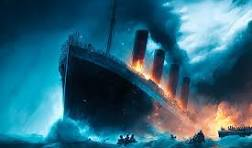

In [654]:
# Load and display images of Titanic ship on fire before sink
from IPython.display import Image, display
display(Image("/content/titanic_image1.png", width=500, height=500))

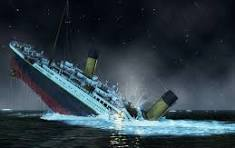

In [655]:
#image of Titanic sink in North Atlantic Ocean
display(Image("/content/titanic-sink_image.png", width=500, height=500))

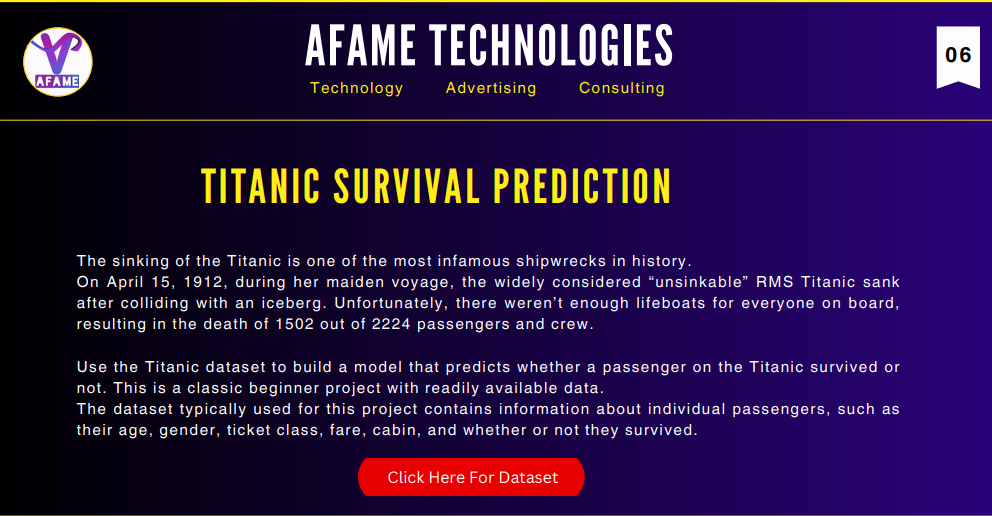

In [656]:
#project activity details image by Afame technologies
Image("/content/Titanic_project(details).png")

##***import all necessary modules***

In [657]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning
from sklearn.model_selection import train_test_split #for spliting the dataset in to train and test data for model and prediction
from sklearn.preprocessing import StandardScaler, LabelEncoder #help to convert to numerical
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score #for cross validation of model Accuracy
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

##Load Titanic dataset

In [658]:
df=pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##***Exploratory Data Analysis (EDA)***
EDA Steps-\
1.Understand the Dataset Structure\
2.Univariate Analysis\
3.Bivariate Analysis\
4.Missing Values Analysis\
5.Feature Correlation Analysis.

In [659]:
# Basic statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [660]:
#check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [661]:
#shape of dataset
df.shape

(891, 12)

In [662]:
#column list in data set
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##***Handling the missing values***

In [663]:
#chek all null value if any
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [664]:
# Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [665]:
#drop the null value in Embarked(go on board a ship or aircraft)
df.dropna(subset=['Embarked'], inplace=True)

In [666]:
#shape of dataset after treating missing values
df.shape

(889, 12)

In [667]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [668]:
# Fill missing Cabin values with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

In [669]:
#check the null value if any after treating missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

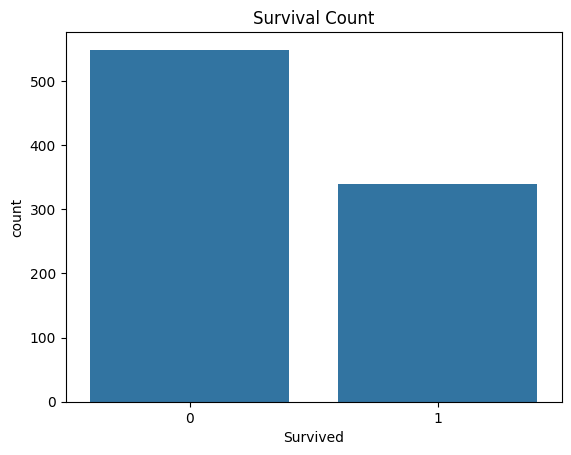

In [670]:
# Plot the survival rate
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

#survival rate of different sex

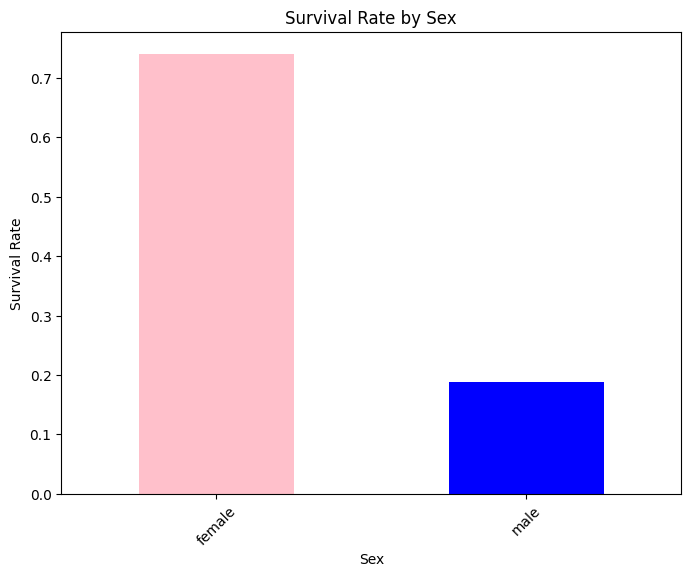

In [671]:
# Calculate the survival rate for each sex
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean()

# Plot the survival rate by sex as a bar chart
plt.figure(figsize=(8, 6))
survival_rate_by_sex.plot(kind='bar', color=['pink', 'blue'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

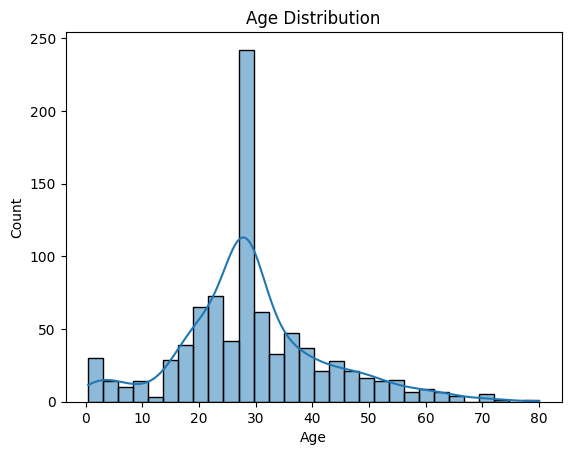

In [672]:
# Plot the distribution of age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

#survival rate according to age group:-

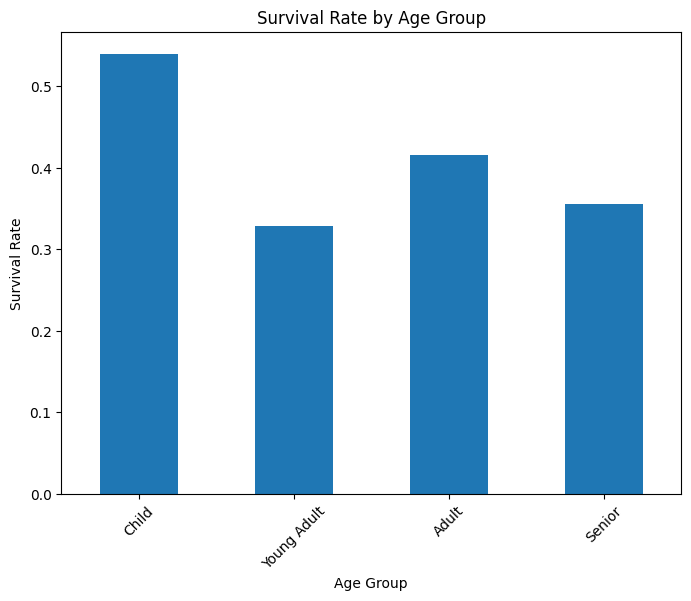

In [673]:
# age bins and labels
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']

# Create a new column 'AgeGroup' with age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the survival rate for each age group
survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean()

# Plot the survival rate by age group as a bar chart
plt.figure(figsize=(8, 6))
survival_rate_by_age_group.plot(kind='bar')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

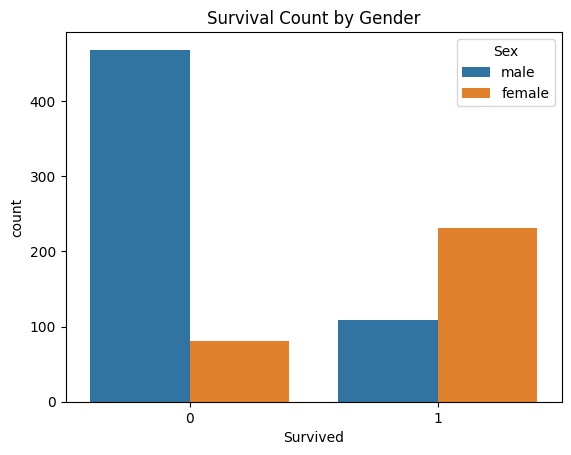

In [674]:
# Plot survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

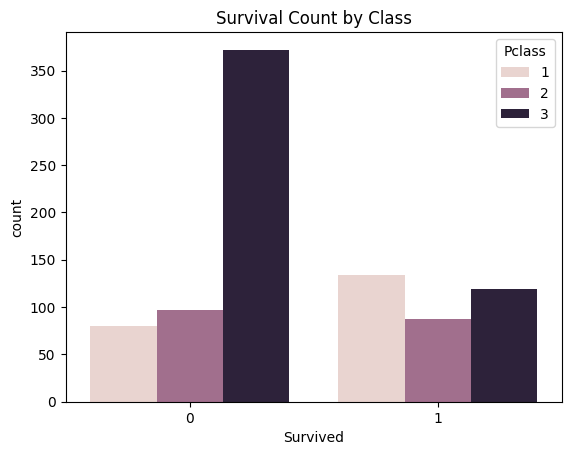

In [675]:
# Plot survival rate by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Class')
plt.show()


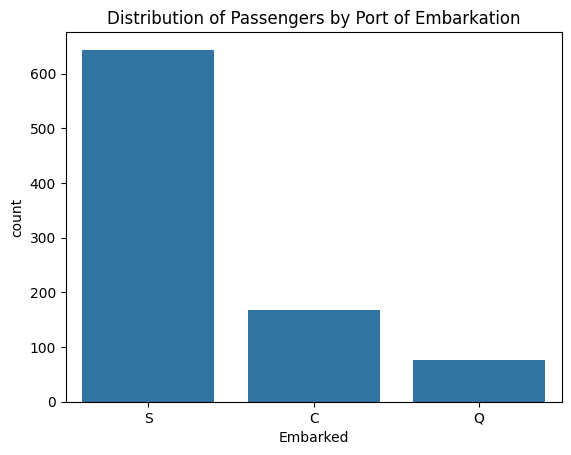

In [676]:
#Distribution of Passengers by Port of Embarkation
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Passengers by Port of Embarkation')
plt.show()

In [677]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

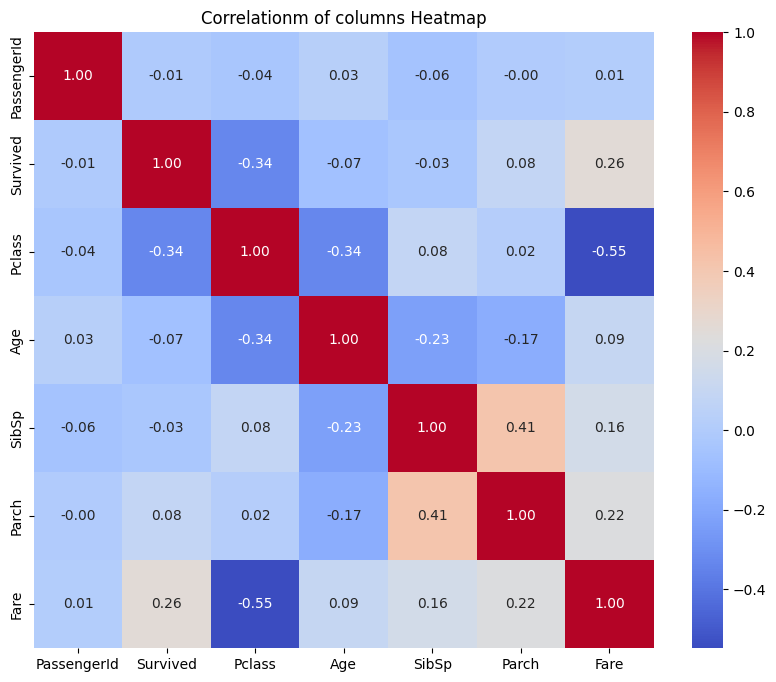

In [678]:
#correlation heatmap of all numeriacal columns
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlationm of columns Heatmap')
plt.show()

##***Model Building to prediction***

In [679]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'AgeGroup']

In [680]:
# convert  categorical variables in numerical variable using level encoding
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['AgeGroup'] = label_encoder.fit_transform(df['AgeGroup'])

In [681]:
#drop passenger id and name because it not relevent for survival
df.drop(['PassengerId', 'Name','Age','Ticket','Cabin'], axis=1, inplace=True)

In [682]:
#create bin for different fare in to group to check that can impact on suvival or not because it has high correlation  value
# Define bins and labels
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create a new column 'Fare_bin'
df['Fare_bin'] = pd.cut(df['Fare'], bins=bins, labels=labels, include_lowest=True)
df['Fare_bin'] = df['Fare_bin'].astype(int)

In [683]:
#now we can drop the Fare column from dataset as we create group of diffent fare price
df.drop('Fare', axis=1, inplace=True)

#Split the datset in to train and test dataset

In [684]:
# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Apply different model on train dataset then find accuracy with test dataset

In [685]:
#Using LogisticRegression
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train,y_train)
y_pred_lr = LogisticModel.predict(X_test)

#check model accuracy
LogisticRegression_accuracy = accuracy_score(y_test,y_pred_lr)
print("LogisticRegression_accuracy=",LogisticRegression_accuracy)

LogisticRegression_accuracy= 0.8052434456928839


In [686]:
#Confusion Matrix
confusion_mat = confusion_matrix(y_test,y_pred_lr)
print(confusion_mat)
print(classification_report(y_test,y_pred_lr))

[[140  27]
 [ 25  75]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       167
           1       0.74      0.75      0.74       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [687]:
# Gradient Boosting model
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

# apply Predictions on this model using test dataset
pred_y_gb = model_gb.predict(X_test)

#check the accuracy of model prediction according to test dataset
GradientBoosting_accuracy = accuracy_score(y_test, pred_y_gb)
print("GradientBoosting_accuracy=",GradientBoosting_accuracy)

GradientBoosting_accuracy= 0.797752808988764


In [688]:
#check on accuracy in accuracy matrix between test and model prediction
confusion_mat = confusion_matrix(y_test,pred_y_gb)
print(confusion_mat)
print(classification_report(y_test,pred_y_gb))

[[148  19]
 [ 35  65]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       167
           1       0.77      0.65      0.71       100

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [689]:
# Random Forest model apply
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predictions of test
pred_y_rf = model_rf.predict(X_test)

# Check model accuracy
RandomForest_accuracy = accuracy_score(y_test, pred_y_rf)
print("Random Forest Accuracy =", RandomForest_accuracy)

Random Forest Accuracy = 0.7940074906367042


In [690]:
#chck the accuracy of this model usinf confusion matrix
confusion_mat = confusion_matrix(y_test,pred_y_rf)
print(confusion_mat)
print(classification_report(y_test,pred_y_rf))

[[147  20]
 [ 35  65]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       167
           1       0.76      0.65      0.70       100

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [691]:
#Using Support Vector
SVMmodel = SVC()
SVMmodel.fit(X_train,y_train)

#prediction test data
pred_y_svm = SVMmodel.predict(X_test)

#check model accuracy of support vector
SVM_Accuracy =accuracy_score(y_test,pred_y_svm)
print("SVM Accuracy:-",SVM_Accuracy)

SVM Accuracy:- 0.8052434456928839


In [692]:
confusion_mat = confusion_matrix(y_test,pred_y_svm)
print(confusion_mat)
print(classification_report(y_test,pred_y_svm))

[[144  23]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       167
           1       0.76      0.71      0.73       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [693]:
#Using KNN  model for nearest point
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

#check model accuracy of knn model
KNN_Accuracy = accuracy_score(y_test,y_pred2)
print("KNN Accuracy Score:",KNN_Accuracy)

KNN Accuracy Score: 0.7790262172284644


In [694]:
#confusion matrix comaparision of knn  with test data
confusion_mat = confusion_matrix(y_test,y_pred2)
print(confusion_mat)
print(classification_report(y_test,y_pred2))

[[142  25]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       167
           1       0.73      0.66      0.69       100

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267



In [695]:
#Using GaussianNB model("Naive Bayes") to predict survival
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

#check model accuracy
GaussianNB_accuracy = accuracy_score(y_test,y_pred3)
print("GaussianNB_accuracy=",GaussianNB_accuracy)

GaussianNB_accuracy= 0.7865168539325843


In [696]:
#now check the coonfusion matrix gussian model with test data by confusion report
confusion_mat = confusion_matrix(y_test,y_pred3)
print(confusion_mat)
print(classification_report(y_test,y_pred3))

[[135  32]
 [ 25  75]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       167
           1       0.70      0.75      0.72       100

    accuracy                           0.79       267
   macro avg       0.77      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [697]:
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

#check model accuracy of decision tree
DecisionTree_accuracy = accuracy_score(y_test,y_pred4)
print("DecisionTree_accuracy=",DecisionTree_accuracy)

DecisionTree_accuracy= 0.7865168539325843


In [698]:
#check tthe model using confusion matrix for accuracy prediction of test data
confusion_mat = confusion_matrix(y_test,y_pred4)
print(confusion_mat)
print(classification_report(y_test,y_pred4))

[[149  18]
 [ 39  61]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       167
           1       0.77      0.61      0.68       100

    accuracy                           0.79       267
   macro avg       0.78      0.75      0.76       267
weighted avg       0.78      0.79      0.78       267



#Find which model is more accurate
-In this model accuracy both svm and logistic_reg has same highest accuracy rate.\
-But logistic_reg is faster and more interpretable for large dataset.\
-So we can use logistic_reg model to Deploy in the dataset.

In [699]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','RandomForest','Support Vector Machines','GradientBoosting', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [LogisticRegression_accuracy,RandomForest_accuracy,SVM_Accuracy,GradientBoosting_accuracy,GaussianNB_accuracy,KNN_Accuracy,DecisionTree_accuracy]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
0.805243,Logistic Regression
0.805243,Support Vector Machines
0.797753,GradientBoosting
0.794007,RandomForest
0.786517,Naive Bayes
0.786517,Decision Tree
0.779026,KNN


In [700]:
#For Cross Validation of model Between two which one is better
svm_scores = cross_val_score(SVMmodel, X, y, cv=5)
logistic_scores = cross_val_score(LogisticModel, X, y, cv=5)

print("SVM Cross-Validation Scores:", svm_scores)
print("Logistic Regression Cross-Validation Scores:", logistic_scores)


SVM Cross-Validation Scores: [0.81460674 0.80898876 0.79213483 0.79775281 0.82485876]
Logistic Regression Cross-Validation Scores: [0.78651685 0.79775281 0.78651685 0.76404494 0.8079096 ]


In [701]:
#find the mean value of all CV(cross validation) values then bigger mean value is better model
print("Mean CV Score for SVM:", svm_scores.mean())
print("Mean CV Score for Logistic Regression:", logistic_scores.mean())

Mean CV Score for SVM: 0.8076683806259126
Mean CV Score for Logistic Regression: 0.7885482130387864


##Conclusion
If SVM meets your computational and practical requirements, it would be the preferred choice for deployment due to its higher accuracy. If resources or interpretability are significant concerns, you might choose Logistic Regression despite the slightly lower accuracy.